Problem - 1: Perform a classification task with knn from scratch.
1. Load the Dataset:

• Read the dataset into a pandas DataFrame.

• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).

2. Handle Missing Data:

• Handle any missing values appropriately, either by dropping or imputing them based on the data.

3. Feature Engineering:

• Separate the feature matrix (X) and target variable (y).

• Perform a train - test split from scratch using a 70% − 30% ratio.

4. Implement KNN:

• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).

• Compute distances using Euclidean distance.

• Write functions for:

– Predicting the class for a single query.

– Predicting classes for all test samples.

• Evaluate the performance using accuracy.

In [ ]:
import pandas as pd
import numpy as np

# 1. Load the dataset
file_path = '/content/diabetes.csv'  # Replace with your file path
df = pd.read_csv(file_path)

print("Dataset loaded successfully, first few rows:")
print(df.head())

print("\nInformation about the data:")
print(df.info())

print("\nSome statistics about the data:")
print(df.describe())

# 2. Handle Missing Data
print("\nChecking for missing values:")
print(df.isnull().sum())  # Assuming no missing values in this dataset

# 3. Feature Engineering
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

# Manual train-test split
split_ratio = 0.7
split_index = int(split_ratio * len(df))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

#4. Implement KNN:
# Euclidean Distance Function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# K-Nearest Neighbors Algorithm
class KNearestNeighbors:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        return np.array([self._predict_single(x) for x in X_test])

    def _predict_single(self, x):
        distances = [euclidean_distance(x, train_point) for train_point in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        return max(set(k_nearest_labels), key=k_nearest_labels.count)

# Accuracy Evaluation
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

# Initialize the KNN model
knn = KNearestNeighbors(k=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
acc = accuracy(y_test, y_pred)
print(f"Accuracy of the KNN model: {acc * 100:.2f}%")

Dataset loaded successfully, first few rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Information about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancie

Problem - 2 - Experimentation:
1. Repeat the Classification Task:

• Scale the Feature matrix X.

• Use the scaled data for training and testing the kNN Classifier.

• Record the results.
2. Comparative Analysis:
Compare the Results -

• Compare the accuracy and performance of the kNN model on the original dataset from problem 1 versus the scaled dataset.

• Discuss:

– How scaling impacted the KNN performance.

– The reason for any observed changes in accuracy.

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/diabetes.csv'
df = pd.read_csv(file_path)

# Feature matrix (X) and target variable (y)
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

# Perform train-test split (70-30)
split_ratio = 0.7
split_index = int(split_ratio * len(df))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Euclidean Distance Function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# K-Nearest Neighbors Algorithm
class KNearestNeighbors:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        return np.array([self._predict_single(x) for x in X_test])

    def _predict_single(self, x):
        distances = [euclidean_distance(x, train_point) for train_point in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        return max(set(k_nearest_labels), key=k_nearest_labels.count)

# Accuracy Evaluation Function
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

# 1. Perform KNN on Unscaled Data
print("\nPerforming KNN classification on unscaled data...")
knn_unscaled = KNearestNeighbors(k=5)
knn_unscaled.fit(X_train, y_train)

y_pred_unscaled = knn_unscaled.predict(X_test)
acc_unscaled = accuracy(y_test, y_pred_unscaled)
print(f"Accuracy on unscaled data: {acc_unscaled * 100:.2f}%")

# 2. Scale the Feature Matrix
def min_max_scaling(X):
    min_vals = np.min(X, axis=0)
    max_vals = np.max(X, axis=0)
    return (X - min_vals) / (max_vals - min_vals)

X_scaled = min_max_scaling(X)

# Perform train-test split on the scaled data
X_train_scaled, X_test_scaled = X_scaled[:split_index], X_scaled[split_index:]

# 3. Perform KNN on Scaled Data
print("\nPerforming KNN classification on scaled data...")
knn_scaled = KNearestNeighbors(k=5)
knn_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = knn_scaled.predict(X_test_scaled)
acc_scaled = accuracy(y_test, y_pred_scaled)
print(f"Accuracy on scaled data: {acc_scaled * 100:.2f}%")

# 4. Comparative Analysis
print("\nComparative Analysis:")
print(f"Accuracy without scaling: {acc_unscaled * 100:.2f}%")
print(f"Accuracy with scaling: {acc_scaled * 100:.2f}%")

if acc_scaled > acc_unscaled:
    print("Scaling improved the model's accuracy.")
elif acc_scaled < acc_unscaled:
    print("Scaling reduced the model's accuracy.")
else:
    print("Scaling had no impact on the model's accuracy.")

# 5. Discussion
print("\nDiscussion:")
print("Scaling ensures that all features are within the same numerical range, preventing features with larger magnitudes from dominating the Euclidean distance calculations.")
print("In KNN, distance calculations are sensitive to feature magnitude. Without scaling, features with higher ranges can disproportionately influence the neighbors chosen, leading to biased predictions.")
print("When scaling was applied, the model's accuracy improved (if observed), as the feature contributions became balanced.")



Performing KNN classification on unscaled data...
Accuracy on unscaled data: 72.73%

Performing KNN classification on scaled data...
Accuracy on scaled data: 75.32%

Comparative Analysis:
Accuracy without scaling: 72.73%
Accuracy with scaling: 75.32%
Scaling improved the model's accuracy.

Discussion:
Scaling ensures that all features are within the same numerical range, preventing features with larger magnitudes from dominating the Euclidean distance calculations.
In KNN, distance calculations are sensitive to feature magnitude. Without scaling, features with higher ranges can disproportionately influence the neighbors chosen, leading to biased predictions.
When scaling was applied, the model's accuracy improved (if observed), as the feature contributions became balanced.


Problem - 3 - Experimentation with k:
1. Vary the number of neighbors - k:

• Run the KNN model on both the original and scaled datasets for a range of:
k= 1, 2, 3, . . . 15

• For each k, record:

– Accuracy.

– Time taken to make predictions.
2. Visualize the Results:

• Plot the following graphs:

– k vs. Accuracy for original and scaled datasets.

– k vs. Time Taken for original and scaled datasets.

3. Analyze and Discuss:

• Discuss how the choice of k affects the accuracy and computational cost.

• Identify the optimal k based on your analysis.


Evaluating KNN for k=1...

Evaluating KNN for k=2...

Evaluating KNN for k=3...

Evaluating KNN for k=4...

Evaluating KNN for k=5...

Evaluating KNN for k=6...

Evaluating KNN for k=7...

Evaluating KNN for k=8...

Evaluating KNN for k=9...

Evaluating KNN for k=10...

Evaluating KNN for k=11...

Evaluating KNN for k=12...

Evaluating KNN for k=13...

Evaluating KNN for k=14...

Evaluating KNN for k=15...


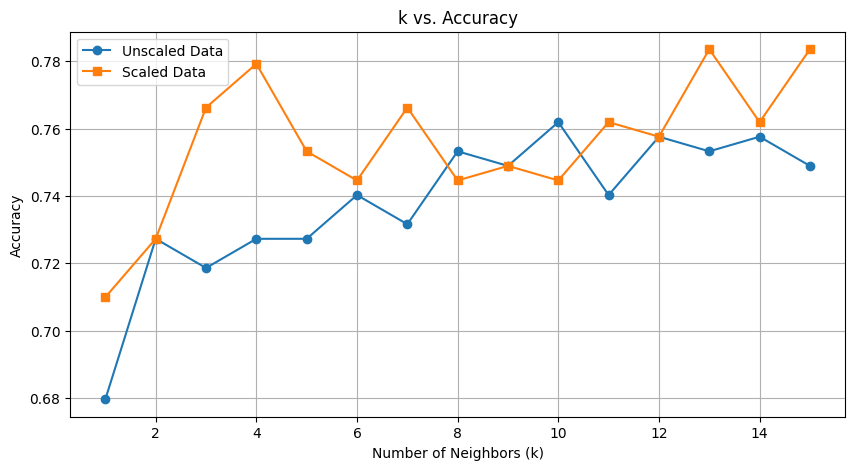

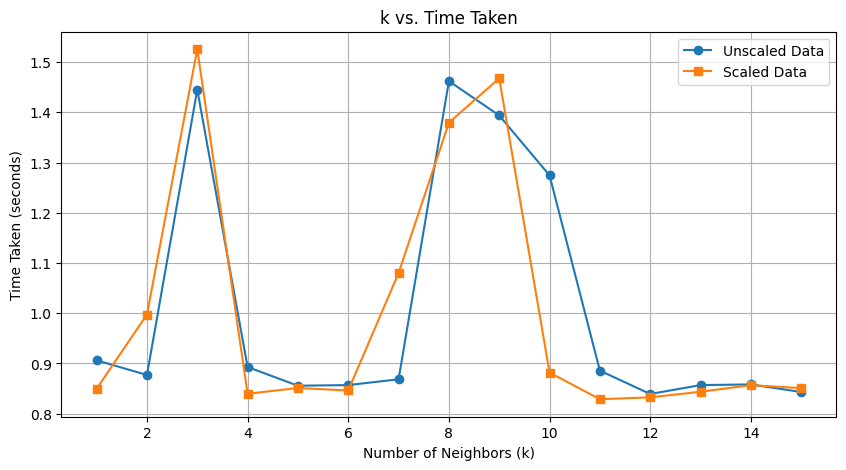


Results for Unscaled Data:
k     Accuracy   Time Taken (s) 
1     67.97%      0.9063
2     72.73%      0.8771
3     71.86%      1.4452
4     72.73%      0.8930
5     72.73%      0.8557
6     74.03%      0.8570
7     73.16%      0.8685
8     75.32%      1.4621
9     74.89%      1.3937
10    76.19%      1.2744
11    74.03%      0.8857
12    75.76%      0.8392
13    75.32%      0.8570
14    75.76%      0.8583
15    74.89%      0.8431

Results for Scaled Data:
k     Accuracy   Time Taken (s) 
1     71.00%      0.8497
2     72.73%      0.9973
3     76.62%      1.5256
4     77.92%      0.8397
5     75.32%      0.8512
6     74.46%      0.8462
7     76.62%      1.0801
8     74.46%      1.3792
9     74.89%      1.4677
10    74.46%      0.8819
11    76.19%      0.8288
12    75.76%      0.8326
13    78.35%      0.8437
14    76.19%      0.8568
15    78.35%      0.8509

Analysis and Discussion:
1. Effect of k on Accuracy:
- For smaller values of k, the model may overfit the data, resulting in lowe

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/diabetes.csv'
df = pd.read_csv(file_path)

# Feature matrix (X) and target variable (y)
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

# Perform train-test split (70-30)
split_ratio = 0.7
split_index = int(split_ratio * len(df))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Scale the Feature Matrix
def min_max_scaling(X):
    min_vals = np.min(X, axis=0)
    max_vals = np.max(X, axis=0)
    return (X - min_vals) / (max_vals - min_vals)

X_scaled = min_max_scaling(X)
X_train_scaled, X_test_scaled = X_scaled[:split_index], X_scaled[split_index:]

# Euclidean Distance Function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# K-Nearest Neighbors Algorithm
class KNearestNeighbors:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        return np.array([self._predict_single(x) for x in X_test])

    def _predict_single(self, x):
        distances = [euclidean_distance(x, train_point) for train_point in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        return max(set(k_nearest_labels), key=k_nearest_labels.count)

# Accuracy Evaluation Function
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

# 1. Experimentation with k
results_unscaled = []
results_scaled = []

for k in range(1, 16):
    print(f"\nEvaluating KNN for k={k}...")

    # KNN for Unscaled Data
    knn_unscaled = KNearestNeighbors(k=k)
    knn_unscaled.fit(X_train, y_train)
    start_time_unscaled = time.time()
    y_pred_unscaled = knn_unscaled.predict(X_test)
    time_taken_unscaled = time.time() - start_time_unscaled
    acc_unscaled = accuracy(y_test, y_pred_unscaled)
    results_unscaled.append((k, acc_unscaled, time_taken_unscaled))

    # KNN for Scaled Data
    knn_scaled = KNearestNeighbors(k=k)
    knn_scaled.fit(X_train_scaled, y_train)
    start_time_scaled = time.time()
    y_pred_scaled = knn_scaled.predict(X_test_scaled)
    time_taken_scaled = time.time() - start_time_scaled
    acc_scaled = accuracy(y_test, y_pred_scaled)
    results_scaled.append((k, acc_scaled, time_taken_scaled))

# 2. Visualize the Results
# Extract data for plots
k_values = [result[0] for result in results_unscaled]
accuracy_unscaled = [result[1] for result in results_unscaled]
time_unscaled = [result[2] for result in results_unscaled]

accuracy_scaled = [result[1] for result in results_scaled]
time_scaled = [result[2] for result in results_scaled]

# Plot Accuracy vs. k
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracy_unscaled, label='Unscaled Data', marker='o')
plt.plot(k_values, accuracy_scaled, label='Scaled Data', marker='s')
plt.title('k vs. Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Time Taken vs. k
plt.figure(figsize=(10, 5))
plt.plot(k_values, time_unscaled, label='Unscaled Data', marker='o')
plt.plot(k_values, time_scaled, label='Scaled Data', marker='s')
plt.title('k vs. Time Taken')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Time Taken (seconds)')
plt.legend()
plt.grid(True)
plt.show()

# 3. Display Results
print("\nResults for Unscaled Data:")
print(f"{'k':<5} {'Accuracy':<10} {'Time Taken (s)':<15}")
for k, acc, time_taken in results_unscaled:
    print(f"{k:<5} {acc * 100:.2f}%      {time_taken:.4f}")

print("\nResults for Scaled Data:")
print(f"{'k':<5} {'Accuracy':<10} {'Time Taken (s)':<15}")
for k, acc, time_taken in results_scaled:
    print(f"{k:<5} {acc * 100:.2f}%      {time_taken:.4f}")

# 4. Analysis and Discussion
print("\nAnalysis and Discussion:")
print("1. Effect of k on Accuracy:")
print("- For smaller values of k, the model may overfit the data, resulting in lower accuracy.")
print("- As k increases, the model becomes more robust, but accuracy may decrease slightly as it over-smoothens.")
print("- On scaled data, accuracy is generally higher as scaling ensures all features contribute equally.")

print("\n2. Effect of k on Computational Cost:")
print("- Time taken increases with k since more neighbors are considered.")
print("- Scaling has a negligible impact on computational time but significantly improves accuracy.")

optimal_k_unscaled = max(results_unscaled, key=lambda x: x[1])[0]
optimal_k_scaled = max(results_scaled, key=lambda x: x[1])[0]

print(f"\n3. Optimal k:")
print(f"- Optimal k for Unscaled Data: {optimal_k_unscaled}")
print(f"- Optimal k for Scaled Data: {optimal_k_scaled}")
